<a href="https://colab.research.google.com/github/Christian-Young/AI-Machine-Learning/blob/master/HW_3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1

Implement the function `get_random_data(w, b, mu, sigma, m)` that generates random data for logisitic regression with two features features x_1 and x_2. This function should return the array data of shape (m, 2) and the array labels of shape (m, 1).

The entries of the arrays should be generated as follows. For each row i in {0, 1, ..., m-1}:

* Choose class label `c=0` with probability `1/2` and `c=1` with probability `1/2`.
* Choose the first feature `x_1` uniformly at random in the interval `[0, 1)`.
* Set the second feature `x_2` to be `x_2 = w * x_1 + b + (-1)^c * n`, where the "noise" `n` is chosen according to the normal distribution with mean `mu` and standard deviation `sigma`.
* The ith row of the array `data` consists of the features `x_1` and `x_2`.
* The ith entry of the vector `labels` is the class label `c`.

Implement the function `display_random_data` that takes as input the above two arrays `labels` and `data`. It should create scatter plot of the 2D points stored in data. Use red dots to plot the points whose labels are 1 and blue dots to plot the points whose labels are 0.

Hints: You should see that the 2D points (feature vectors) corresponding to different classes are approximately separated by the line `y = w * x + b`, where `w` and `b` are the parameters that you used to generate the data. Note that the smaller the parameter `mu`, the closer the points are to this line. Also, the larger the parameter `sigma`, the more points can be on the wrong side of this line.

Experiment with different values of `mu` and `sigma`. Make sure that the parameter `m` is large enough so you have enough data points.

Split the data/labels into a training set (80%) and a test set (20%).

Links to the numpy documentation of the functions that can be used to draw samples according to the uniform and normal distributions:

* [Normal distribution](https://docs.scipy.org/doc/numpy-1.17.0/reference/random/generated/numpy.random.Generator.normal.html)
* [Uniform distribution](https://docs.scipy.org/doc/numpy-1.17.0/reference/random/generated/numpy.random.Generator.uniform.html)

You can learn more about the normal distribution on https://en.wikipedia.org/wiki/Normal_distribution. To gain some intuition, it would be helpful to plot the Gaussian function for different parameters `mu` and `sigma` in a seperate notebook (that you do not have to submit). Later in the semester, you will need to work with normal distribution to understand variational autoencoders.

In [0]:
# Imports
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

In [0]:
# Implementing the function get_random_data(w, b, mu, sigma, m)
# which generates data for logistic regression with features x1 and x2.
def get_random_data(w, b, mu, sigma, m):

  # The "noise" n is chosen according to the normal distribution with the mean
  # being mu and the standard deviation being sigma.
  n = np.random.normal(mu, sigma, m)

  # Class label
  # c = 0 has 50% probability and c = 1 has 50% probability.
  c = np.random.randint(2, size = m)

  # Uniformly random on the interval [0, 1)
  x1 = np.random.rand(m)

  # x_2 = w * x_1 + b + (-1)^c * n
  x2 = w * x1 + b + (-1) ** c * n

  variables = np.column_stack([x1, x2])

  return (variables, c)

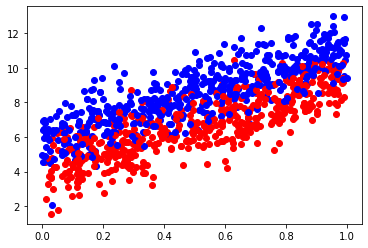

In [0]:
# Generating random data with the get_random_data function
m = 5000

# Training set
partial = (int) (m * 0.8)

# Get random data with the function and m = 5000
data, labels = get_random_data(5, 5, 1, 1, m)

display = 1
# Plot the output of get_random_data with display_random_data(labels, data)
def display_random_data(labels, data):
  # Test set
  displayAmount = (int) (m * 0.2)
  labelsSubset = labels[:displayAmount]
  dataSubset = data[:displayAmount]
  for cc, point in zip(labelsSubset, dataSubset):
    # Uses red dots to plot the points whose labels are 1 and blue dots to plot
    # the points whose labels are 0.
    plt.scatter(point[0], point[1], color = ('red' if cc == 1 else 'blue'))
  if display:
    plt.style.use('dark_background')
    plt.show()

# Show the data
display_random_data(labels, data)

#Problem 2

Create a Keras to implement logistic regression with two features and train it with the data generated in Problem 1. The loss should be the binary cross entropy loss.

How well does the trained model separate the red and blue dots? You can obtain the separating line determined by the model by extracting the weights from the dense layer using the function `get_weights`. See https://keras.io/layers/about-keras-layers/.

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model. Make sure that you describe in detail in your notebook how you proceed to obtain the separating line.

Note that you have to carry out some simple steps to obtain the separating line from the model weights (the two weights and the bias term of the dense layer). This is not immediately obvious. It maybe helpful to take a look at the heatmap below.

The trained model realizes function `f : R^2 -> R` that takes two features as input and outputs a number in the interval `[0, 1]`. Use a heatmap to visualize this function.

### The following notebook(s) was(were) referenced: [imdb_movie_reviews_classification_dense_layers.ipynb](https://colab.research.google.com/drive/1hUc_4HTtPQ2Xq0XXnokV4uoK84zmmvQR)

In [0]:
# Epochs and learning rate(this is also used later)
numEpochs = 100
lr = 0.001

# Refers to the function defined in the notebook above
def build_and_compile_model():
  # build model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(1, activation = 'sigmoid', input_shape = (2,)))
  # compile model
  model.compile(optimizer = tf.keras.optimizers.RMSprop(lr),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
  return model

In [0]:
# Training and validation
train = data[:partial]
labelTrain = labels[:partial]
validate = data[partial:]
labelValidate = labels[partial:]

# Build and train the model
myModel = build_and_compile_model()

history = myModel.fit(train,
                    labelTrain,
                    epochs = numEpochs,
                    batchSize = 256,
                    validationData = (validate, labelValidate))

Epoch 1/100
125/125 [==============================] - 0s 1ms/step - loss: 4.5905 - accuracy: 0.4960
Epoch 2/100
125/125 [==============================] - 0s 1ms/step - loss: 3.9647 - accuracy: 0.4960
Epoch 3/100
125/125 [==============================] - 0s 965us/step - loss: 3.3492 - accuracy: 0.4960
Epoch 4/100
125/125 [==============================] - 0s 1ms/step - loss: 2.7325 - accuracy: 0.4960
Epoch 5/100
125/125 [==============================] - 0s 1ms/step - loss: 2.1410 - accuracy: 0.4960
Epoch 6/100
125/125 [==============================] - 0s 1ms/step - loss: 1.5944 - accuracy: 0.4958
Epoch 7/100
125/125 [==============================] - 0s 1ms/step - loss: 1.1297 - accuracy: 0.4915
Epoch 8/100
125/125 [==============================] - 0s 974us/step - loss: 0.8543 - accuracy: 0.3483
Epoch 9/100
125/125 [==============================] - 0s 1ms/step - loss: 0.7810 - accuracy: 0.2725
Epoch 10/100
125/125 [==============================] - 0s 952us/step - loss: 0.7712 - 

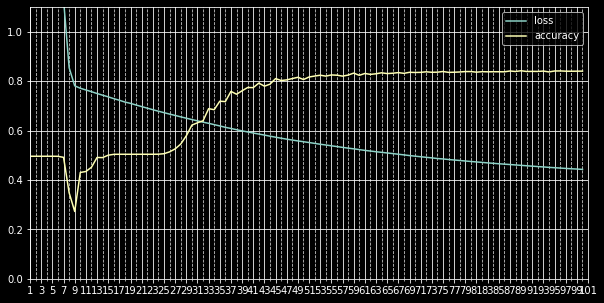

In [0]:
pd.DataFrame(history.history).plot(figsize = (10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.1) 
plt.gca().set_xlim(0, numEpochs)

plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : int(x + 1)))
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().grid(which = 'minor', color = '#CCCCCC', linestyle = '--')

plt.show()

[]

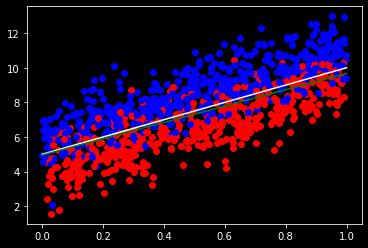

In [0]:
# Plot the line that the data trained on and the separating line that the model determined.
# "True" line
xActual = np.linspace(0.0, 1.0, 100)
yActual = xActual * 5 + 5

plt.plot(xActual, yActual, color = 'white')

# Extraction of model's line
xNew = np.linspace(0.0, 1.0, 100)
weights = myModel.layers[0].get_weights()
bias = weights[1][0]
x1Weight = weights[0][0]
x2Weight = weights[0][1]
yNew = (-(bias / x2Weight) / (bias / x1Weight)) * xNew + (-bias / x2Weight)

# Show
plt.style.use('dark_background')
plt.plot(xNew, yNew, color = 'green')
display = 0
display_random_data(labels, data)
plt.plot()

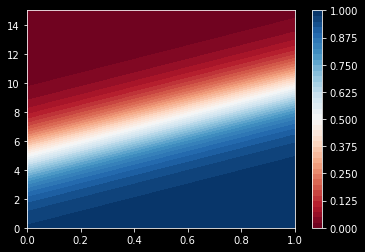

In [0]:
# Heatmap visualization
xLin = np.linspace(0, 1, 300)
yLin = np.linspace(0, 15, 300)

x, y = np.meshgrid(xLin, yLin)
z = myModel.predict(np.c_[x.ravel(), y.ravel()])
z = z.reshape(x.shape)

# Set bounds
plt.xlim([0, 1])
plt.ylim([0, 15])

# Display heatmap
plt.contourf(x, y, z, 40, cmap = 'RdBu')
plt.colorbar()
plt.show()

#Problem 3

Use numpy to implement a logistic regression model from scratch and train it with the data generated as in Problem 1.

Hints: Look at the notes on logistic regression to figure out what the gradient is of the binary cross entropy loss with respect to `w` and `b`. Note that you only have to implement stochastic gradient, that is, you do not have to write vectorized code for mini-batch gradient descent.

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model.

Use a heatmap to visualize the function defined by your trained model.

You also have to compute the binary cross entropy loss and accuracy on the test set.

In [0]:
# Sigmoid function defined as $ 1 / {(1 + e^{-z})} $
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# Binary cross entropy function for evaluation
def binary_cross_entropy(y, a):
  return -y * np.log10(a) - (1 - y) * np.log10(1 - a)

# Computing loss function
def compute_loss(A, B):
  loss = 0
  for dataVal, label in zip(A, B):
    pred = np.dot(np.reshape(manualWeights, (2,)), dataVal) + manualBias
    bce = binary_cross_entropy(label, sigmoid(pred))
    loss = loss + bce
  loss = loss / (partial)
  return loss

In [0]:
# Logistic regression for the number of epochs defined above
manualWeights = np.random.rand(2)
manualBias = np.zeros(1)

for epoch in np.arange(numEpochs):
  for i in np.arange(partial):
    yPred = np.dot(manualWeights, train[i]) + manualBias
    inner = sigmoid(yPred) - labelTrain[i]
    gradientWeight0 = inner * train[i][0]
    gradientWeight1 = inner * train[i][1]
    gradientB = inner
    manualWeights[0] = manualWeights[0] - lr * gradientWeight0
    manualWeights[1] = manualWeights[1] -  lr * gradientWeight1
    manualBias = manualBias - lr * gradientB

# Compute loss
print(compute_loss(validate, labelValidate))

[0.03908509]


In [0]:
# Find accuracy
accuracy = 0
for dataVal, label in zip(validate, labelValidate):
  yPrediction = np.dot(np.reshape(manualWeights, (2,)), dataVal) + manualBias
  labelPrediction = 1 if sigmoid(yPrediction) > 0.5 else 0
  accuracy += 1 if labelPrediction == label else 0

# Compute accuracy
print(accuracy / (m - partial))

0.853


[]

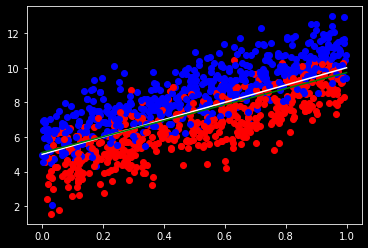

In [0]:
# Plot the estimated line
# The "true" line
xActual = np.linspace(0.0, 1.0, 100)
yActual = xActual * 5 + 5
plt.plot(xActual, yActual, color = 'white')

xNew = np.linspace(0.0, 1.0, 100)
bias = manualBias[0]
x1Weight = manualWeights[0]
x2Weight = manualWeights[1]
yNew = (-(bias / x2Weight) / (bias / x1Weight)) * xNew + (-bias / x2Weight)

# Show the data
plt.plot(xNew, yNew, color = 'green')
display = 0
display_random_data(labels, data)
plt.style.use('dark_background')
plt.plot()

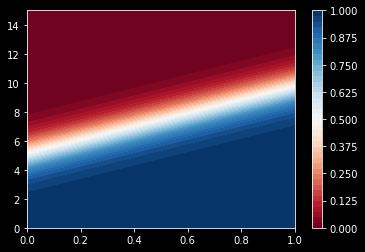

In [0]:
# Logistic regression heatmap
xLin = np.linspace(0, 1, 300)
yLin = np.linspace(0, 15, 300)
x, y = np.meshgrid(xLin, yLin)

# Uses weight and bias to construct heatmap
z = sigmoid(x.ravel() * manualWeights[0] + y.ravel() * manualWeights[1] + manualBias[0])
z = z.reshape(x.shape)

# Set bounds
plt.xlim([0, 1])
plt.ylim([0, 15])

# Display heatmap
plt.contourf(x, y, z, 40, cmap = 'RdBu')
plt.colorbar()
plt.show()